In [26]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

In [27]:
DATASET = '../datasets/blobs2.csv'

In [33]:
data = pd.read_csv(DATASET)
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size=0.8)

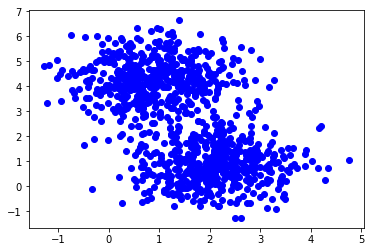

In [29]:
plt.plot(data['x'], data['y'], 'bo')
plt.show()

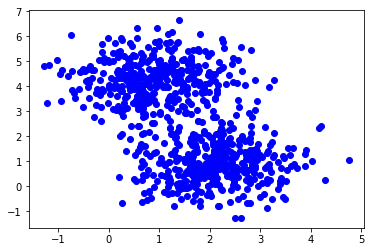

In [30]:
plt.plot(train_data['x'], train_data['y'], 'bo')
plt.show()

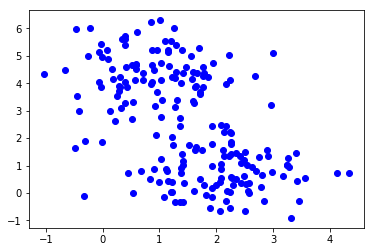

In [31]:
plt.plot(test_data['x'], test_data['y'], 'bo')
plt.show()

In [195]:
def perceptron(train_data, test_data, max_iterations=10):
    min_x = min(train_data['x'].min(), test_data['x'].min())
    max_x = max(train_data['x'].max(), test_data['x'].max())
    min_y = min(train_data['y'].min(), test_data['y'].min())
    max_y = max(train_data['y'].max(), test_data['y'].max())
    min_all = min(min_x, min_y)
    max_all = max(max_x, max_y)
    weights = []
    w = np.array([random.uniform(min_all, max_all),
                 random.uniform(min_x, max_x),
                 random.uniform(min_y, max_y)])
    weights.append(list(w))
    def calc_h(x_row):
        val = np.matmul(w, np.transpose(x_row))
        return -1 if val < 0 else 1
    def to_pm(val):
        return -1 if val == 0 else 1
    for _ in range(max_iterations):
        adjusted = False
        for index, row in train_data.iterrows():
            x_i = np.concatenate((np.array([1]), row.values[:2]))
            y_i = to_pm(row.values[2])
            if calc_h(x_i) != y_i:
                w = list(w + x_i * y_i)
                weights.append(w)
                adjusted = True
                break
        if not adjusted:
            break
    return weights

In [196]:
weights = perceptron(train_data, test_data)

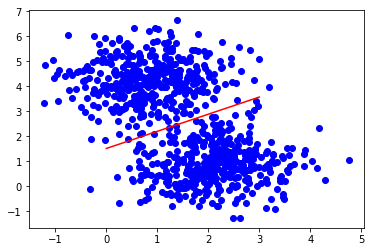

In [206]:
for w in weights:
    w = weights[2]
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    ys = [- (w0 + w1 * x) / w2 for x in range(4)]
    plt.plot(train_data['x'], train_data['y'], 'bo')
    plt.plot(ys, 'r-')
    break
plt.show()

In [199]:
def calc_accuracy(w):
    tp_tn = 0
    def calc_h(x_row):
        val = np.matmul(w, np.transpose(x_row))
        return -1 if val < 0 else 1
    def to_pm(val):
        return -1 if val == 0 else 1
    for index, row in test_data.iterrows():
        x_i = np.concatenate((np.array([1]), row.values[:2]))
        y_i = to_pm(row.values[2])
        tp_tn += calc_h(x_i) == y_i
    return tp_tn

In [216]:
best_weight = max(weights, key=lambda x: calc_accuracy(x))

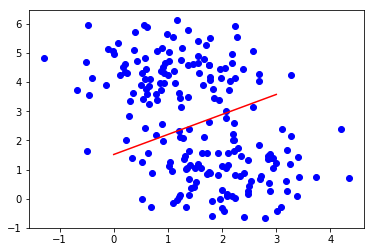

In [217]:
w = best_weight
w0 = w[0]
w1 = w[1]
w2 = w[2]
ys = [- (w0 + w1 * x) / w2 for x in range(4)]
plt.plot(test_data['x'], test_data['y'], 'bo')
plt.plot(ys, 'r-')
plt.show()